In [ ]:
import sys 
sys.path.append('../')
import os
from environment.deephive_utils import *
from environment.utils import *
import numpy as np
from dotenv import load_dotenv
load_dotenv()
import matplotlib.pyplot as plt

In [20]:
def run_experiment(env, agent_policy, timesteps, iters, save_gif=False, result_path="experiment/"):
    gbest_values = []
    if save_gif:
        os.makedirs(result_path, exist_ok=True)
    for iter in range(iters):
        print("Iteration: ", iter)
        observation_info = env.reset()
        episode_gbVals = []
        for _ in range(timesteps):
            episode_gbVals.append(env.gbest[-1])
            exploiters_action =  get_action(observation_info, agent_policy, env)
            explorer_action = get_informed_action(env)
            # split the agents into two groups and let one group exploit and the other explore
            actions = np.zeros((env.n_agents, env.n_dim))
            actions[:env.n_agents//2] = exploiters_action[:env.n_agents//2]
            actions[env.n_agents//2:] = explorer_action[env.n_agents//2:]
            observation_info, reward, done, info = env.step(actions)
        gbest_values.append(episode_gbVals)
        if save_gif:
            _ = env.render(type="history", file_path=result_path + "iter_" + str(iter) + ".gif")
    return gbest_values

In [21]:
# #Experiment 1: VARIANCE DRIVEN EXPLORERS AND EXPLOITERS
config_path = '../config/config.json'
model_path = "../models/exploiting_model.pth"
mode = "test"
env1, agent_policy1 = initialize(config_path, mode=mode, model_path=model_path)
config = parse_config(config_path)
agent_policy1.set_action_std(config["test_action_std"])

#Experiment 2: NO DIVISION
model_path = "../models/policy-50000.pth"
mode = "test"
env2, agent_policy2 = initialize(config_path, mode=mode, model_path=model_path)
config = parse_config(config_path)
agent_policy2.set_action_std(config["test_action_std"])

iters = 10
exp_num = 3
timesteps = 20
experiments = [
    [env1, agent_policy1, f"variance_driven_exploration_{exp_num}", timesteps, iters, True, "experiment/"],
    [env2, agent_policy2, f"no_division_{exp_num}", timesteps, iters, True, "experiment/"]
]

Loaded policy from:  ../models/exploiting_model.pth
Loaded policy from:  ../models/policy-50000.pth


Iteration:  0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  3


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  4


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  6


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  8


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


Iteration:  9


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
MovieWriter Pillow unavailable; using Pillow instead.


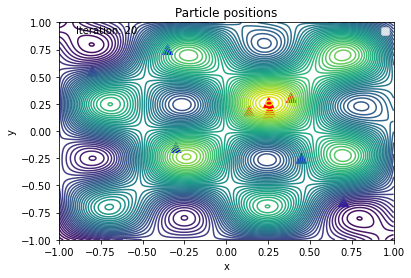

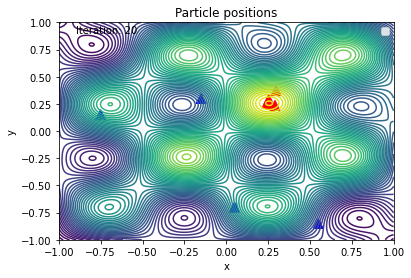

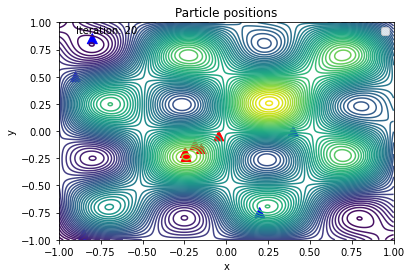

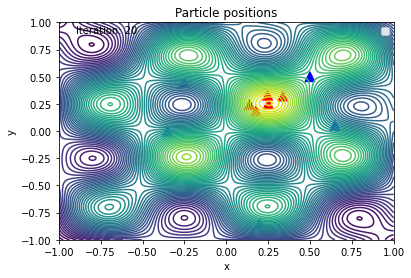

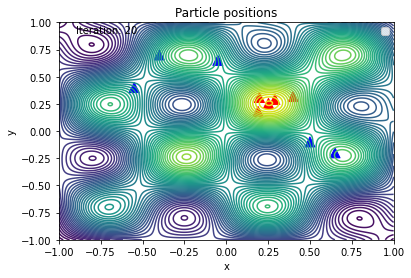

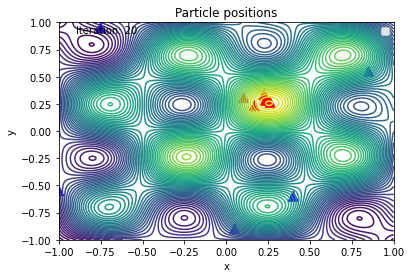

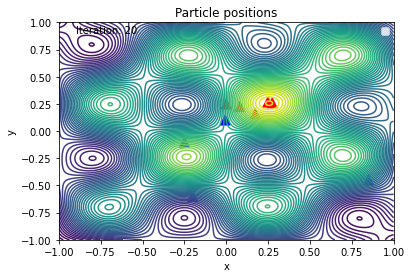

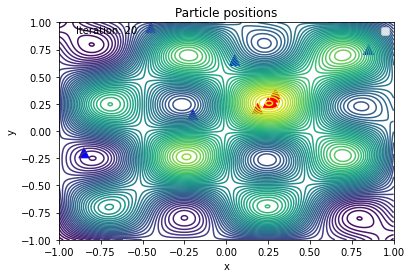

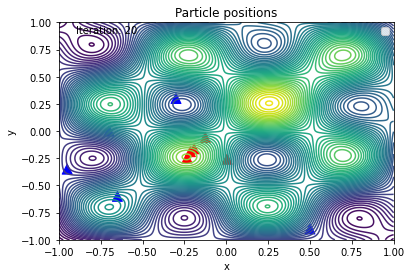

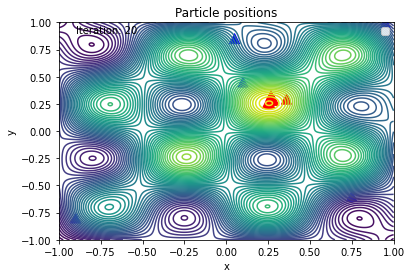

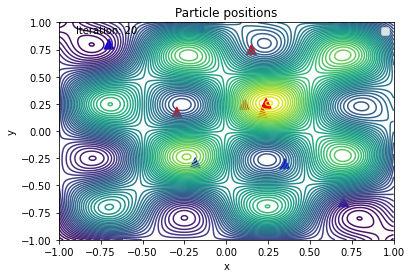

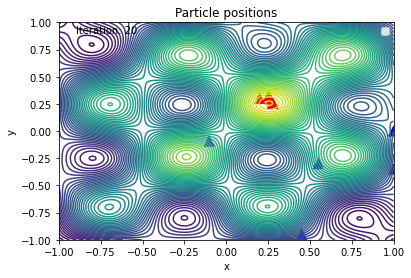

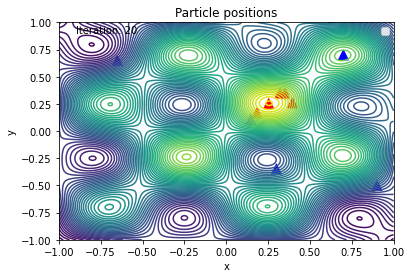

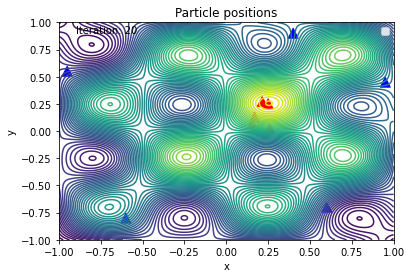

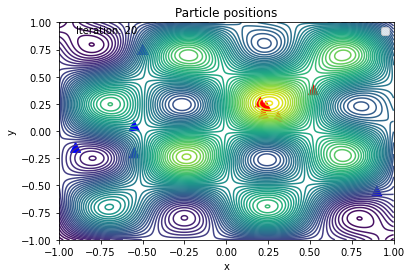

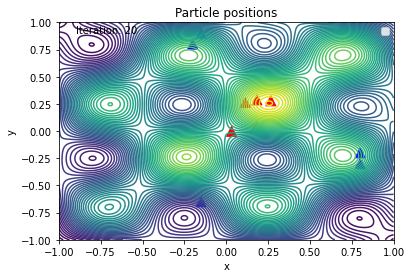

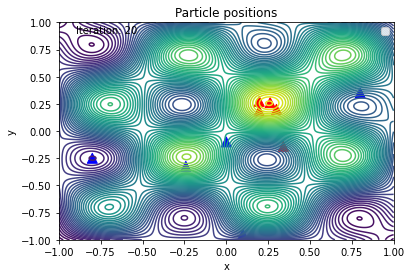

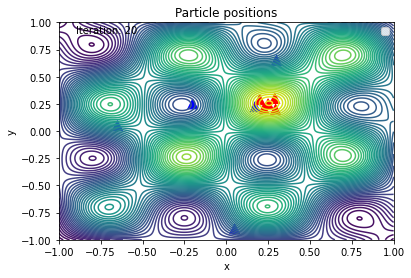

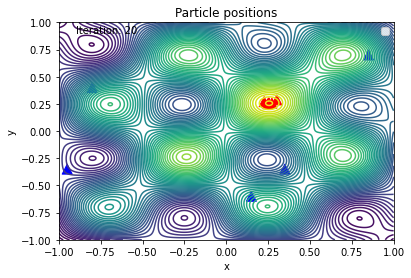

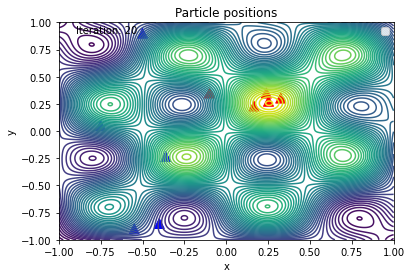

In [22]:
all_symbols = ["-", "--", "-.", ":"]
all_colors = ["r", "g", "b", "k"]

symbol_list = []
color_list = []
label_list = []
gbest_values = []
for i, experiment in enumerate(experiments):
    env, agent_policy, name, timesteps, iters, save_gif, result_path = experiment
    gbest_value = run_experiment(env, agent_policy, timesteps, iters, save_gif, f"{result_path}{name}/")
    np.save(result_path + name + "_gbest_values.npy", gbest_values)
    gbest_values.append(gbest_value)
    symbol_list.append(all_symbols[i])
    color_list.append(all_colors[i])
    label_list.append(name)

In [23]:
plot_num_function_evaluation(fopt=np.array(gbest_values), label_list=label_list, symbol_list=symbol_list, color_list=color_list, save_dir=f"experiment/comparison_{exp_num}.png",
                             n_agents=env.n_agents, opt_value=env.objective_function.optimal_value(env.n_dim))

Number of function evaluations: 10
Number of algorithms: 2
